In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# ========== PART A: CLASSIFICATION ==========

# 1. Load (preprocessed) Iris data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Train-test split (e.g., 70-30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (105, 4) Test shape: (45, 4)


In [3]:
# 1a. Train Decision Tree classifier
dt_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    random_state=42
)
dt_clf.fit(X_train, y_train)

# 1b. Predict on test set
y_pred_dt = dt_clf.predict(X_test)

# 1c. Compute metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='macro', zero_division=0)
dt_recall = recall_score(y_test, y_pred_dt, average='macro', zero_division=0)
dt_f1 = f1_score(y_test, y_pred_dt, average='macro', zero_division=0)

print("=== Decision Tree Metrics ===")
print("Accuracy :", dt_accuracy)
print("Precision:", dt_precision)
print("Recall   :", dt_recall)
print("F1-score :", dt_f1)
print("\nClassification report (Decision Tree):")
print(classification_report(y_test, y_pred_dt, zero_division=0))

=== Decision Tree Metrics ===
Accuracy : 0.9333333333333333
Precision: 0.9444444444444445
Recall   : 0.9333333333333332
F1-score : 0.9326599326599326

Classification report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89        15
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



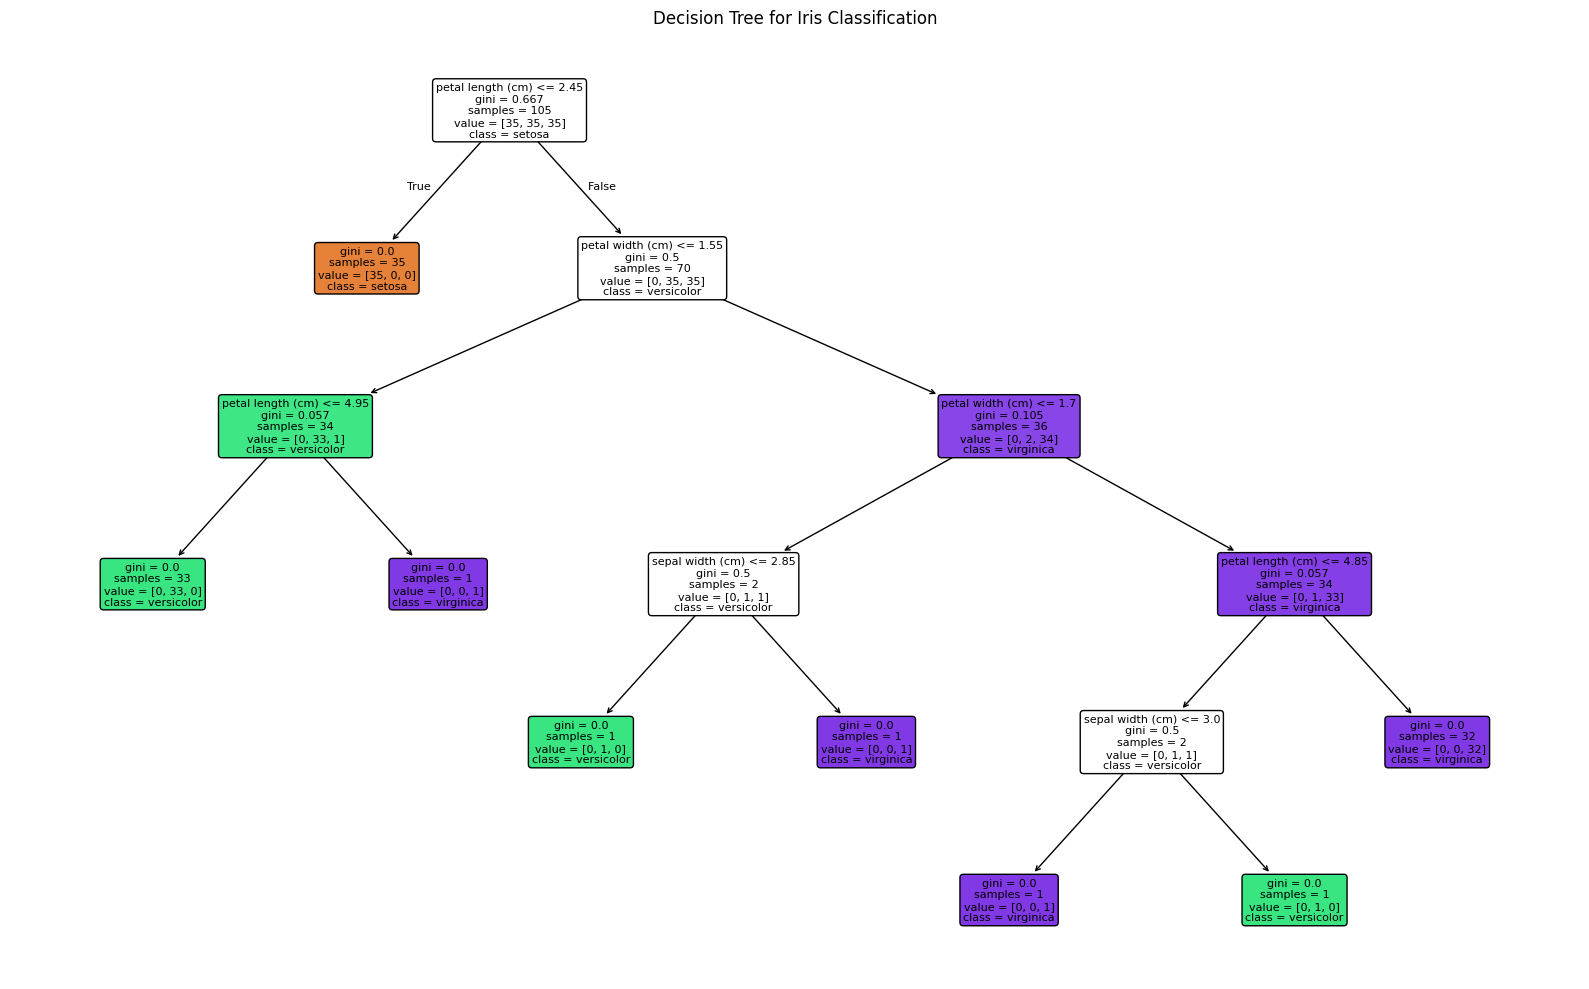

In [4]:
# 1d. Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(
    dt_clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree for Iris Classification")
plt.tight_layout()
plt.show()

In [5]:
# 2a. Train KNN (k=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# 2b. Predict and compute metrics
y_pred_knn = knn_clf.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='macro', zero_division=0)
knn_recall = recall_score(y_test, y_pred_knn, average='macro', zero_division=0)
knn_f1 = f1_score(y_test, y_pred_knn, average='macro', zero_division=0)

print("=== KNN (k=5) Metrics ===")
print("Accuracy :", knn_accuracy)
print("Precision:", knn_precision)
print("Recall   :", knn_recall)
print("F1-score :", knn_f1)
print("\nClassification report (KNN):")
print(classification_report(y_test, y_pred_knn, zero_division=0))

=== KNN (k=5) Metrics ===
Accuracy : 0.9777777777777777
Precision: 0.9791666666666666
Recall   : 0.9777777777777779
F1-score : 0.9777530589543938

Classification report (KNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [6]:
print("=== Model Comparison ===")
print(f"Decision Tree - Accuracy: {dt_accuracy:.3f}, Precision: {dt_precision:.3f}, "
      f"Recall: {dt_recall:.3f}, F1: {dt_f1:.3f}")
print(f"KNN           - Accuracy: {knn_accuracy:.3f}, Precision: {knn_precision:.3f}, "
      f"Recall: {knn_recall:.3f}, F1: {knn_f1:.3f}")

=== Model Comparison ===
Decision Tree - Accuracy: 0.933, Precision: 0.944, Recall: 0.933, F1: 0.933
KNN           - Accuracy: 0.978, Precision: 0.979, Recall: 0.978, F1: 0.978


The Decision Tree achieved accuracy X vs KNN’s Y.
- If Decision Tree is better: it may capture non-linear splits well and fit tightly to the training data. The visualization also provides interpretability.
- If KNN is better: it might generalize slightly better in this split because it’s a lazy learner relying on local neighborhoods.

Explicitly state which model is better based on F1/accuracy and justify using: performance metrics + interpretability vs simplicity.


In [7]:
# ========== PART B: ASSOCIATION RULE MINING ==========

random.seed(42)
np.random.seed(42)

# 1. Define item pool
item_pool = [
    'milk', 'bread', 'butter', 'eggs', 'cheese',
    'beer', 'diapers', 'juice', 'cereal', 'apples',
    'bananas', 'chicken', 'rice', 'pasta', 'yogurt',
    'tomatoes', 'onions', 'toothpaste', 'soap', 'chips'
]

n_transactions = 40  # between 20 and 50
transactions = []

for _ in range(n_transactions):
    basket_size = random.randint(3, 8)
    basket = set()

    # Inject patterns to create frequent co-occurrences
    r = random.random()
    if r < 0.3:
        basket.update(['milk', 'bread'])       # pattern 1
    if 0.3 <= r < 0.5:
        basket.update(['beer', 'diapers'])     # pattern 2

    # Fill remaining with random items
    while len(basket) < basket_size:
        basket.add(random.choice(item_pool))

    transactions.append(list(basket))

print("Number of transactions:", len(transactions))
print("Example transactions (first 5):")
for t in transactions[:5]:
    print(t)

Number of transactions: 40
Example transactions (first 5):
['cheese', 'milk', 'eggs', 'juice', 'butter', 'bread', 'toothpaste', 'cereal']
['onions', 'milk', 'juice', 'beer', 'chips', 'butter', 'diapers']
['juice', 'pasta', 'toothpaste']
['pasta', 'cheese', 'milk', 'beer', 'bananas', 'cereal']
['rice', 'bananas', 'butter', 'eggs']


In [8]:
# Create one-hot encoded DataFrame from transaction list
df_baskets = pd.DataFrame(0, index=range(n_transactions), columns=item_pool)

for i, basket in enumerate(transactions):
    for item in basket:
        df_baskets.loc[i, item] = 1

print("\nOne-hot encoded basket data (head):")
print(df_baskets.head())


One-hot encoded basket data (head):
   milk  bread  butter  eggs  cheese  beer  diapers  juice  cereal  apples  \
0     1      1       1     1       1     0        0      1       1       0   
1     1      0       1     0       0     1        1      1       0       0   
2     0      0       0     0       0     0        0      1       0       0   
3     1      0       0     0       1     1        0      0       1       0   
4     0      0       1     1       0     0        0      0       0       0   

   bananas  chicken  rice  pasta  yogurt  tomatoes  onions  toothpaste  soap  \
0        0        0     0      0       0         0       0           1     0   
1        0        0     0      0       0         0       1           0     0   
2        0        0     0      1       0         0       0           1     0   
3        1        0     0      1       0         0       0           0     0   
4        1        0     1      0       0         0       0           0     0   

   chips  
0 

In [9]:
# 2a. Frequent itemsets using Apriori
frequent_itemsets = apriori(
    df_baskets,
    min_support=0.2,  # at least 20% of transactions
    use_colnames=True
)

print("\nFrequent itemsets (support >= 0.2):")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))


Frequent itemsets (support >= 0.2):
    support         itemsets
4     0.475           (beer)
5     0.450        (diapers)
0     0.425           (milk)
1     0.375          (bread)
2     0.375         (butter)
11    0.350     (toothpaste)
16    0.350  (beer, diapers)
6     0.325          (juice)
13    0.300    (bread, milk)
7     0.275         (cereal)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [10]:
# 2b. Association rules
rules = association_rules(
    frequent_itemsets,
    metric='confidence',
    min_threshold=0.5   # min_confidence = 0.5
)

print("\nAll rules with confidence >= 0.5:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


All rules with confidence >= 0.5:
  antecedents consequents  support  confidence      lift
0     (bread)      (milk)      0.3    0.800000  1.882353
1      (milk)     (bread)      0.3    0.705882  1.882353
2    (butter)      (milk)      0.2    0.533333  1.254902
3     (juice)    (butter)      0.2    0.615385  1.641026
4    (butter)     (juice)      0.2    0.533333  1.641026


In [11]:
rules_sorted = rules.sort_values('lift', ascending=False)
top5_rules = rules_sorted.head(5)

print("\nTop 5 rules sorted by lift:")
for idx, row in top5_rules.iterrows():
    print(f"Rule: {set(row['antecedents'])} -> {set(row['consequents'])}")
    print(f"  support:    {row['support']:.3f}")
    print(f"  confidence: {row['confidence']:.3f}")
    print(f"  lift:       {row['lift']:.3f}")
    print("---")


Top 5 rules sorted by lift:
Rule: {'milk'} -> {'bread'}
  support:    0.300
  confidence: 0.706
  lift:       1.882
---
Rule: {'bread'} -> {'milk'}
  support:    0.300
  confidence: 0.800
  lift:       1.882
---
Rule: {'juice'} -> {'butter'}
  support:    0.200
  confidence: 0.615
  lift:       1.641
---
Rule: {'butter'} -> {'juice'}
  support:    0.200
  confidence: 0.533
  lift:       1.641
---
Rule: {'diapers'} -> {'beer'}
  support:    0.350
  confidence: 0.778
  lift:       1.637
---


In [12]:
# Pick one illustrative rule (e.g., the first of top5)
example_rule = top5_rules.iloc[0]
antecedent = set(example_rule['antecedents'])
consequent = set(example_rule['consequents'])

print("\nExample rule for analysis:")
print(f"{antecedent} -> {consequent}")
print(f"Support: {example_rule['support']:.3f}, "
      f"Confidence: {example_rule['confidence']:.3f}, "
      f"Lift: {example_rule['lift']:.3f}")


Example rule for analysis:
{'milk'} -> {'bread'}
Support: 0.300, Confidence: 0.706, Lift: 1.882


The rule {milk} → {bread} with high confidence and lift > 1 means customers who buy milk are significantly more likely than average to also buy bread. For a retailer, this suggests:
- placing milk and bread close together to encourage joint sales,
- designing promotions like “milk + bread” bundles, or
- using this rule in recommendation systems: when a customer adds milk to their basket (online), recommend bread.
